## Medium array problems

### 2 sum problem
Consider arr = [2,6,5,8,11] and target = 14. Does there exist any two elements whose sum is equal to target

In [ ]:
# Brute force: using nested loop
arr = [2,6,5,8,11]
target = 14
for i in range(len(arr)):
    f = 0
    for j in range(i+1,len(arr)):
        if arr[i]+arr[j] == target:
            print("Yes")
            print([i,j]) # Return indeces of those two elements
            f = 1
            break
    if f:
        break
# Time complexity is O(n^2)
# Space complexity is O(1)

Yes
[1, 3]


In [ ]:
# Using hashing
# Store each element in hash
# subtract each element with the target and check if the difference exist in hash or not
hashmp = {} # element with index
for i in range(len(arr)):
    if (target-arr[i]) in hashmp:
        print("Yes")
        print(i,hashmp[target-arr[i]])
        break
    else:
        hashmp[arr[i]]=i
# Time complexity at worst case is O(n)
# Space complexity at worst case is O(n)


Yes
3 1


In [ ]:
# Using 2 pointer
arr.sort() # sort array before applying 2 pointer
i = 0 # starts from 0 
j = len(arr)-1 # start from last
while i<len(arr) and j>0:
    if arr[i]+arr[j] == target:
        print(i,j)
        break
    elif arr[i]+arr[j] < target: # if sum is less than target then move i else move j
        i+=1
    else:
        j-=1
# time complexity if we use merge or quick sort can be log(n), for loop will be O(n)
# total time complexity is O(n)
# space complexity: O(1)

1 3


### Sort an array of 0s, 1s and 2s
arr = [0,1,2,0,1,2,1,2,0,0,0,1] we have to sort this array

In [ ]:
arr = [0,1,2,0,1,2,1,2,0,0,0,1]
print(len(arr))
# count the number of 0s, 1s and 2s
c0 = 0
c1 = 0
c2 = 0
for i in arr:
    if i == 0:
        c0+=1
    elif i == 1:
        c1+=1
    elif i == 2:
        c2+=1
# in the array the first place will contain 0s, the next 1s and next 2s
index = 0 # keep updating the index
for i in range(c0):
    arr[index] = 0
    index+=1
for j in range(c1):
    arr[index] = 1
    index+=1
for k in range(c2):
    arr[index] = 2
    index+=1
print(arr)
# The total time complexity is O(2n), n for 1st loop, n for next 3 loops
# Space complexity is O(1)

12
5 4 3 12
[0, 0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2]


#### Dutch national flag algorithm
This algorithm involves 3 pointers => low, mid, high  
It follows 3 rules:  
1. Everything from 0.....low-1 is 0
2. Everything from low......mid-1 is 1
3. Everything from high+1......n-1 is 2  

![Screenshot from 2025-08-22 14-31-44.png](<attachment:Screenshot from 2025-08-22 14-31-44.png>)  

The arr is unsorted so mid will point at 0 and high will point at n-1

![Screenshot from 2025-08-23 11-53-24.png](<attachment:Screenshot from 2025-08-23 11-53-24.png>)

Take arr[mid]  
if arr[mid] == 0 => swap(arr[mid],arr[low]) and low++ and mid++  
if arr[mid] == 1 => mid++  
if arr[mid] == 2 => swap(arr[mid],arr[high]) and high--
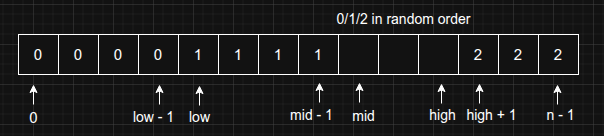
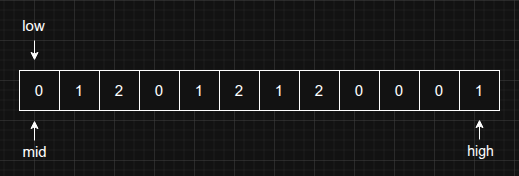

In [2]:
# Dutch national flag algorithm
arr = [0,1,2,0,1,2,1,2,0,0,0,1]
low = 0
mid = 0
high = len(arr)-1
while mid<=high:
    if arr[mid] == 0:
        arr[low],arr[mid] = arr[mid],arr[low] # swap
        low+=1
        mid+=1
    elif arr[mid] == 1:
        mid+=1
    elif arr[mid] == 2:
        arr[mid],arr[high] = arr[high],arr[mid] #swap
        high-=1
print(arr)

# The complexity is O(n), mid goes from 0 to n-1 in worst case scenario
# Space complexity is O(1), no extra space is used


[0, 0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2]


### Majority elements (>n/2 times)
Consider the arr = [2,2,3,3,1,2,2] find the element that appears more than n/2 times.  
Ex: 2 appears 4 times > 7/2 = 3

In [ ]:
# Brute force: use nested loop
arr = [2,2,3,3,1,2,2]
for i in range(len(arr)):
    c = 0
    for j in range(len(arr)):
        if arr[j] == arr[i]:
            c+=1 # count the number of times an element is appearing
    if c > int(len(arr)/2):
        print(arr[i])
        break

# The time complexity is O(n^2)
# space complexity will be O(1)

2


In [ ]:
# Using hash map
hashmp = {}
arr = [2,2,3,3,1,2,2]
for i in arr:
    if i in hashmp:
        hashmp[i]+=1
    else:
        hashmp[i] =1
for i in hashmp:
    if hashmp[i] > int(len(arr)/2):
        print(i)
        break
# The time complexity is O(2n), one for array and other for hashmap
# the space complexity is O(n) in worst case

2


#### Moore's voting algorithm
This algorithm is about 2 variables, ele and count.  
Initial ele is not initialized so ele = 0 and count = 0
Consider arr = [2,2,3,3,1,2,2]  
1. ele = 2 and count = 1
2. 2 appears count = 2 increase by 1
3. 3 appears count = 1 reduce by 1
4. 3 appears count = 0  
    consider [2,2,3,3] -> 2 appears 2 times and other elements appear 2 times and 2=4/2, so 2 in not the majority element
5. move, ele = 1 and count = 1
6. move, 2 appears , count = 0
    consider [1,2] -> 1 appears 1 time and 1=2/2 so 1 is not the majority element
7. move, ele = 2 and count = 1
8. move , 2 appears count 2, reached end element
    count > 0, so ele=2 is our majority element

In [ ]:
# Moore's voting algorithm
arr = [7,7,5,7,5,1,5,7,5,5,7,7,5,5,5,5]
ele = 0
c = 0
# get suppose to be majority element
for i in range(len(arr)):
    if c==0:
        c = 1
        ele = arr[i]
    elif arr[i] == ele:
        c+=1
    else:
        c-=1
# check that if the element is actually the majority element
c1 = 0
for i in range(len(arr)):
    if(arr[i] == ele):
        c1+=1
if(c1>int(len(arr)/2)):
    print(ele)

# Time complexity is O(2n)
# Space complexity is O(1)

5


### Maximum subarray sum
Find the sum of a subarray whose sum is maximum of all subarray's

In [11]:
# Brute force: try all the sub arrays
arr = [-2,-3,4,-1,-2,1,5,-3]
maxsum = 0
for i in range(len(arr)):
    for j in range(i,len(arr)):
        s = 0
        l = i
        while l<=j:
            s+=arr[l]
            l+=1
        if s > maxsum:
            maxsum = s
print(maxsum)
# Time complexity is O(n^3)
# space complexity is O(1)
arr = [-2,-3,4,-1,-2,1,5,-3]
maxsum = 0
for i in range(len(arr)):
    s = 0 # keep updating s as j just increases by one element in each subarray
    for j in range(i,len(arr)):
        s+=arr[j]
        if s > maxsum:
            maxsum = s
print(maxsum)
# Time complexity is O(n^2)
# Space complexity is O(1)

7
7


#### Kadane's algorithm
Consider arr = [-2,-3,4,-1,-2,1,5,-3]  
maxsum = min(arr)-> -3 and s=0  
1. -2, s = -2 , -2 > -3 and maxsum = 3, s<0 so s=0
2. -3, s = -3, -3 < -2 so no update, s<0 so s=0
3. 4, s = 4, 4 > -2, maxsum = 4, s>0 no change
4. -1 s = 3, 3 < 4, so no update, s>0 no change
5. -2, s = 1, 1 < 4, so no update, s>0 no change
6. 1, s = 2, 2 < 4, so no update, s>0 no change
7. 5, s = 7, 7 > 4, maxsum = 7, s>0 no change
8. -3, s = 4 , 4<7 , so no update, s>0 no change

At the end maxsum = 7

In [ ]:
# Kadane's algorithm
arr = [-2,-3,4,-1,-2,1,5,-3]
maxsum = min(arr)
s = 0
for i in range(len(arr)):
    s+=arr[i] # update sum
    if s > maxsum:
        maxsum = s # update maxsum
    if s < 0:
        s=0 # set sum to zero if s less than 0
print(maxsum)
# The time complexity is O(n)
# Space complexity is O(1), no extra space is used

7


In [ ]:
# Finding subarray with maximum sum
arr = [-2,-3,4,-1,-2,1,5,-3]
maxsum = min(arr)
s = 0
start = 0
end = 0
for i in range(len(arr)):
    if s==0:
        start = i # set start at that index when ever s goes to 0
    s+=arr[i] # update sum
    if s > maxsum:
        maxsum = s # update maxsum
        end = i # set end at that index when ever sum > maxsum
    if s < 0:
        s=0 # set sum to zero if s less than 0
print(maxsum)
print(arr[start:end+1])

7
[4, -1, -2, 1, 5]


### Stocks buy and sell
Consider arr = [7,1,5,3,6,4].  
Suppose we decide to buy stock at 2nd day at value = 1 and sell on 5th day when value is 6, the profit gain is 5. We have to decide when do you buy the stock and when do you sell it so that the profit is maximum of all.

You can only sell the stock only when the value is greater than the value at which you bought the stock.

***Approach*** : If you sell on the ith day, you will buy on the minimum price from 1st day to (i-1)th day.  
set minimum to arr[0] and start from index 1, keep a variable to track maxprofit.

In [2]:
arr = [7,1,5,3,6,4]
mini = arr[0]
maxprofit = 0
for i in range(1,len(arr)):
    profit = arr[i] - mini
    maxprofit = max(profit,maxprofit)
    mini = min(mini,arr[i])
print(maxprofit)

5


### Rearrange array in alternating positives and negatives
Consider the array = [3,1,-2,-5,2,-4], we have to arrange the array the array in such a way that we get alternating positive and negative items like [3,-2,1,-5,2,-4]

In [ ]:
# Brute force: Make array for positive and negative and put back alternatively in array
arr = [3,1,-2,-5,2,-4]
pos = []
neg = []
for i in range(len(arr)):
    if arr[i] >=0:
        pos.append(arr[i])
    else:
        neg.append(arr[i])
print(pos)
print(neg)
# pos on even index and neg on odd index
for i in range(len(pos)):
    arr[2*i] = pos[i]
    arr[2*i + 1] = neg[i]
print(arr)
# Time complexity will be O(n + n/2)
# Space complexity will be  O(n)

[3, 1, 2]
[-2, -5, -4]
[3, -2, 1, -5, 2, -4]


In [ ]:
# Optimal: 2 pointers
arr = [3,1,-2,-5,2,-4]
ans = [0]*len(arr) # array to store alternating pos and neg same size as arr
pos = 0 # positive pointer always starts from 0
neg = 1 # negative pointer always starts from 1
for i in range(len(arr)):
    if arr[i]>=0:
        ans[pos] = arr[i]
        pos += 2 # Increment pos by 2
    else:
        ans[neg] = arr[i]
        neg += 2 # Increment neg by 2
print(ans)
# Time complexity is O(n)
# Space complexity is O(n)

[3, -2, 1, -5, 2, -4]


If number of positives and negatives are not equal, there can 2 cases, number of positives > numbder of negatives (or) number of negatives > number of positives. In both the cases remain elements should be put in the last.

In [ ]:
# Brute force
arr = [3,7,1,-2,-5,2,-4,8,9]
pos = []
neg = []
for i in range(len(arr)):
    if arr[i] < 0:
        neg.append(arr[i])
    else:
        pos.append(arr[i])
# Arrange first alternatively
for i in range(min(len(pos),len(neg))):
    arr[2*i] = pos[i]
    arr[2*i + 1] = neg[i]
if len(neg) < len(pos):
    j = len(neg)
    for i in range(len(neg)+len(pos),len(arr)):
        arr[i] = pos[j]
        j+=1
elif  len(neg) > len(pos):
    j = len(pos)
    for i in range(len(neg)+len(pos),len(arr)):
        arr[i] = neg[j]
        j+=1
print(arr)
# Time complexity: O(n) + O(min(pos,neg)) + O(pos-neg or neg-pos) = O(2n)
# Space complexity: O(n)

[3, -2, 7, -5, 1, -4, -4, 8, 9]


### Next Permutation
Consider the arr = [3,1,2], containing 3 integers. These integers can be arranged as  
1 2 3  
1 3 2  
2 1 3  
2 3 1  
3 1 2  
3 2 1  
The number of ways these integers arranged is 3! = 6 ways, these ways are called as permutations  
These permutations are arranged in sorted order, like 1 2 3 > 1 3 2 > 2 1 3 ... etc.  
By this we can say that the ***next permutation*** of [3 1 2] (given) is [3 2 1].  
If [3 2 1] was given which is the last permutation, the next permutation will be [1 2 3] the first permutation.

1. Generation all permutations using recursion: Time complexity will be O(n! x n)
2. Linear search where is arr
3. The next to that will be the next permutation

Time complexity is O(n! x n) + o(n)  
Space complexity is O(n!)

#### Optimal Solution
Consider the array arr = [2, 1, 5, 4, 3, 0, 0]  
- Observations:
    1. Larger prefix match  
    Ex: [1 2 3 4] & [1 2 4 3] is the largested prefix match  
    In array [2] is largested prefix match, because in [1 5 4 3 0 0] there are numbers greater than 1, we didn't take [2 1] and above because in [5 4 3 0 0], no number is greater than 5.  
    2. There is a break point in [1 5 4 3 0 0] where numbers are greater than 1. Here the break point is 1. In general we have to take a loop starting next to 1.
    3. Next we have find someone greater than 1, but the smallest one, in [1 5 4 3 0 0], 3 is the smallest and greater than 1. Now swap it. [2 3 5 4 1 0 0], [2 3] is done.
    4. Now we have to arrange [5 4 1 0 0] in such a way that it appears the smallest. So we sort this part, like [0 0 1 4 5]

    At the end we get next permutation as [2 3 0 0 1 4 5] 

- Algorithm:
    1. Start the loop from reverse, if any element arr[i] < arr[i+1], i is our breakpoint. Label it as index(which is initially -1). If index remains -1, just reverse the array and that will be the answer.  
    2. Start the loop from reverse, if we encounter a number greater than index we will swap it.  
    3. Reverse the array part from index+1 to n-1.

In [ ]:
# Optimal solution
arr = [2,1,5,4,3,0,0]
n = len(arr)
# Finding break point
index = -1
for i in range(n-2,-1,-1):
    if arr[i] < arr[i+1]:
        index = i
        break
print("breakpoint",index)
if index < 0:
    arr.reverse()
    print(arr)
else:
    # Swaping
    for i in range(n-1,index+2,-1):
        if arr[index] < arr[i]:
            arr[index],arr[i] = arr[i],arr[index]
            break
    # Reverse the rest
    r = arr[index+1:]
    r.reverse()
    arr[index+1:] = r
    print(arr)
# Time complexity at worst case will be O(3n)
# Space complexity is O(1)

breakpoint 1
[2, 3, 0, 0, 1, 4, 5]


### Leaders in array
Consider the array = [10, 22, 12, 3, 0, 6], the leader is an element where everything on the right should be smaller.  
Like 22 is a leader everything to its right is smaller than 22.  
So the leaders are = [22, 12, 6]

In [ ]:
# Brute force: using nested loop
arr = [10,22,12,3,0,6]
leaders = []
for i in range(len(arr)):
    leader = True
    for j in range(i+1,len(arr)):
        if arr[j] > arr[i]:
            leader = False
            break
    if leader:
        leaders.append(arr[i])
print(leaders)
# Time complexity is O(n^2)
# In worst case space complexity is O(n)

[22, 12, 6]


In [4]:
# Optimal solution: Backtracking and updating max value
arr = [10,22,12,3,0,6]
leaders = []
m = -1 # Pointer to update
for i in range(len(arr)-1,-1,-1):
    if arr[i] > m:
        m = arr[i]
        leaders.append(arr[i])
print(leaders)

[6, 12, 22]


### Longest Consecutive sequence
Consider the array = [102, 4, 100, 1, 101, 3, 2, 1, 1]  
The consecutive sequence can be [1,2,3,4], [100,101,102]...etc
We have to find the consecutive sequence which have highest length

In [ ]:
# Brute force: Find next consecutive elements of each element we will use nested loop
arr = [102, 4, 100, 1, 101, 3, 2, 1, 1]
longest = 1
for i in range(len(arr)):
    count = 1
    x = arr[i] # Set element
    while(x+1 in arr): # next consecutive is in array
        x = x+1 # set element to next consecutive
        count +=1 # increase counter if next consecutive is found
    if count > longest:
        longest = count
print(longest)
# Time complexity is O(n^2) nested loop
# Space complexity is O(1)

4


#### Better solution
Set the following variables  
longested = 1 -> for length of longest sequence  
lastSmaller = arr[0] -> Keep track of last smaller number encountered  
countCur = 0 -> length of current sequence, reset to 0 if element encounter not part of the sequence.

In [10]:
import sys
nums = [102,4,100,1,101,3,2,1,1]
nums.sort()
if len(nums)>0:
    longest = 1
    lastSmall = -sys.maxsize - 1 # Smallest possible integer
    countCur = 0
    for i in range(len(nums)):
        if nums[i]-1 == lastSmall: # if previous element is lastSmall
            countCur+=1 
            lastSmall = nums[i] # Update new lastSmall
        elif nums[i]!=lastSmall: # else not consecutive and not the lastSmall
            countCur = 1 # Reset to 1
            lastSmall = nums[i] # Update the lastSmall
        if countCur > longest:
            longest = countCur # Update longest
    print(longest)
else:
    print(0)    
# Time complexity will be O(n log n) + O(n) , sorting + single for loop
# Space complexity is O(1), no extra space is used.

4


#### Optimal Solution
1. Put all elements in unordered set.
2. Start looping the set:
    [102 4 100 1 101 3 2]  
    - 102 - 1 = 101, so 102 is not the starting of the sequence since 101 is there in set.
    - 4 - 1 = 3, not starting
    - 100 - 1 = 99, starting element of the sequence because 99 is not there in the set.
        - next 101 is there count 2
        - next 102 is there count 3
        - next 103 is not there so stop
    longest = 3
    - 1 - 1 = 0 so starting point. 1 2 3 4 are there in set so count = 4,  
    longest = 4
    - 101 is not the starting
    - 3 is not the starting
    - 2 is not the starting



In [ ]:
# Optimal solution
arr = [102,4,100,1,101,3,2,1,1]
n = len(arr)
if n==0:
    print(0)
else:
    longest = 1
    s = set(arr)
    for i in s:
        if i-1 not in s: # check for starting of a sequence
            count = 1
            x = i
            while x+1 in s: # count the sequence
                count+=1
                x=x+1
            if longest < count: # update the longest sequence
                longest = count
    print(longest)
# Time complexity is O(n) + O(n) = O(2n), inner while will be only executed if starting element is found.
# Space complexity at worst case is O(n), for best and average O(1)

4
